In [21]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, visualize_transition,plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile

In [22]:
#Create a circuit with 2 qubits
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)

In [23]:
#Applying CNOT gate
qc.cx(0,1)

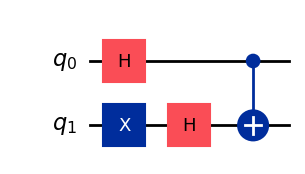

In [24]:
qc.draw('mpl')

In [25]:
backend=Aer.get_backend('unitary_simulator')
compiled_circuit = transpile(qc,backend)
out = backend.run(compiled_circuit).result().get_unitary()
#import qiskit textbook for display of unitary matrix 
from qiskit_textbook.tools import array_to_latex
array_to_latex(out,pretext="\\text{UnitaryMatrix} = ")

<IPython.core.display.Math object>

In [26]:
backend=Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc,backend)
out = backend.run(compiled_circuit).result().get_statevector()
#import qiskit textbook for display of state vector
from qiskit_textbook.tools import array_to_latex
array_to_latex(out,pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

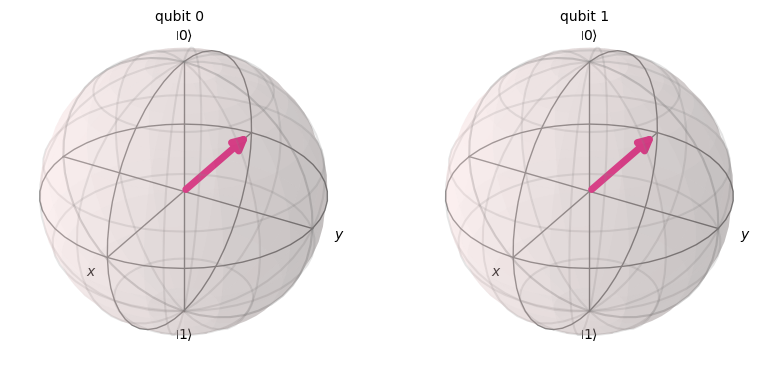

In [27]:
#Plot into the bloch sphere
plot_bloch_multivector(out)

In [28]:
#visualize
# visualize_transition(qc)

In [29]:
# For execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
compiled_circuit.measure_all()
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()

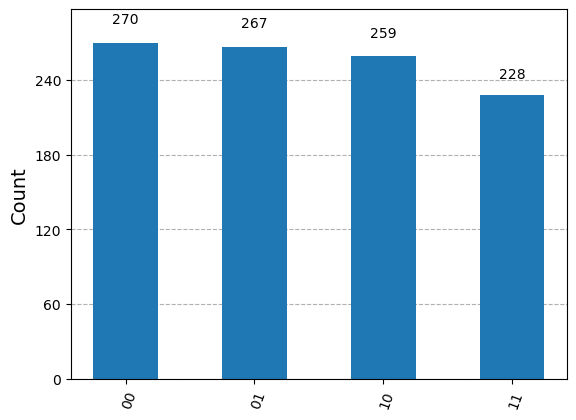

In [30]:
plot_histogram(counts)